## Pseudo-Inverse approach and linear regression

In [ ]:
# import the needed libs
import numpy as np # For different array operations
import pandas as pd # For dealing with CSV files and creating DataFrames
import matplotlib.pyplot as plt # For plotting the graphs
from sklearn.model_selection import train_test_split # For splitting the data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Different loss funcitons

: 

Loading Telecom Traffic Data from the CSV file.

In [2]:
df = pd.read_csv('Telecom Traffic Data - Applied Linear Algebra.csv')

Splitting the data into train/test.

In [3]:
features = ["Season", "DayOfWeek", "Period", "PricePerGB"]
target = ["Arrivals"]

X = df[features]
Y = df[target]

train_X, test_X, train_Y, tset_Y = train_test_split(X, Y, test_size=0.2)

Here is the core of the model, calculating the Pseudo-Inverse and getting fitted coefficients.

In [4]:
X_pinv = np.linalg.pinv(train_X)
coefficients = np.dot(X_pinv, train_Y)
print(coefficients)

[[5.82191472]
 [3.35667931]
 [0.77349461]
 [0.17550485]]


Now use the coefficients to compute the dot product with the test split to obtain the predicted values $\hat{y}$ ($A x = \hat{y}$) -> $A$ is the split set values and $x$ is the coefficients we calculated above.

In [5]:
pred_Y = np.dot(test_X, coefficients)
print(pred_Y.flatten()[:5])

[39.32831409 42.6849934  33.8724415  51.36893893 58.47514198]


Calculate the next 100 days inputs

In [6]:
n_days = 100

# 1. Season = 1 for all days
season = np.ones(n_days, dtype=int)

# 2. Logical DayOfWeek from 1 to 7 (cycling)
day_of_week = ((np.arange(n_days) % 7) + 1).astype(int)

# 3. Random Period (1–24)
period = np.random.randint(1, 25, size=n_days)

# 4. Random PricePerGB (1 or 2)
price_per_gb = np.random.choice([1, 2], size=n_days)

# Combine them into a dataframe
next_100_days_df = pd.DataFrame({
    "Season": season,
    "DayOfWeek": day_of_week,
    "Period": period,
    "PricePerGB": price_per_gb
})

next_100_days_df.head(10)


,Season,DayOfWeek,Period,PricePerGB
0,1,1,5,1
1,1,2,8,2
2,1,3,22,2
3,1,4,16,1
4,1,5,22,2
5,1,6,9,1
6,1,7,17,2
7,1,1,19,2
8,1,2,11,2
9,1,3,5,1


Now let's predict the next 100 days

In [7]:
next_100_days_Y = np.dot(next_100_days_df, coefficients)
print(next_100_days_Y.flatten()[:5])

[13.22157192 19.0742399  33.2598437  31.80005052 39.97320232]


Plotting all the data

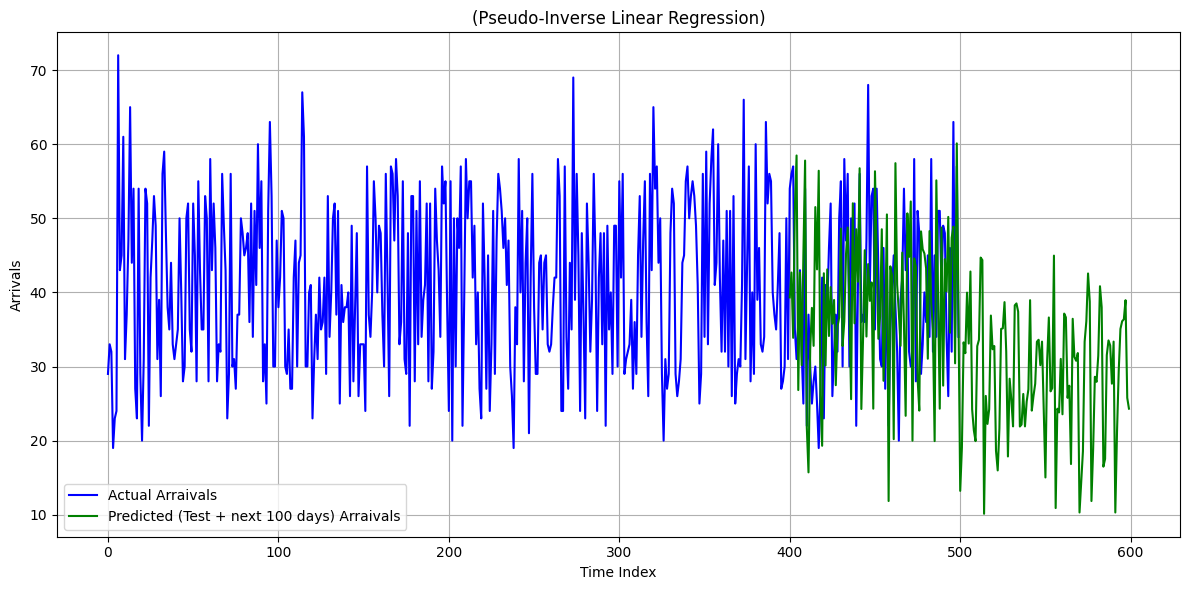

In [8]:
all_actual_data = np.concatenate((train_Y.values, tset_Y.values))
all_predicted = np.concatenate((pred_Y.flatten(), next_100_days_Y.flatten()))

# Create a continuous time axis
actual_data_index = np.arange(len(all_actual_data))
predected_data_index = np.arange(len(train_Y), len(train_Y) + len(all_predicted))

plt.figure(figsize=(12, 6))

# --- Plot sections ---

# 1. Plot all actual
plt.plot(actual_data_index, all_actual_data, label="Actual Arraivals", color="blue")

# 3. Plot predictions on top of test
plt.plot(predected_data_index, all_predicted, label="Predicted (Test + next 100 days) Arraivals", color="green")

# Labels, title, etc.
plt.title("(Pseudo-Inverse Linear Regression)")
plt.xlabel("Time Index")
plt.ylabel("Arrivals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plot only the test part to see our predictions accuracy

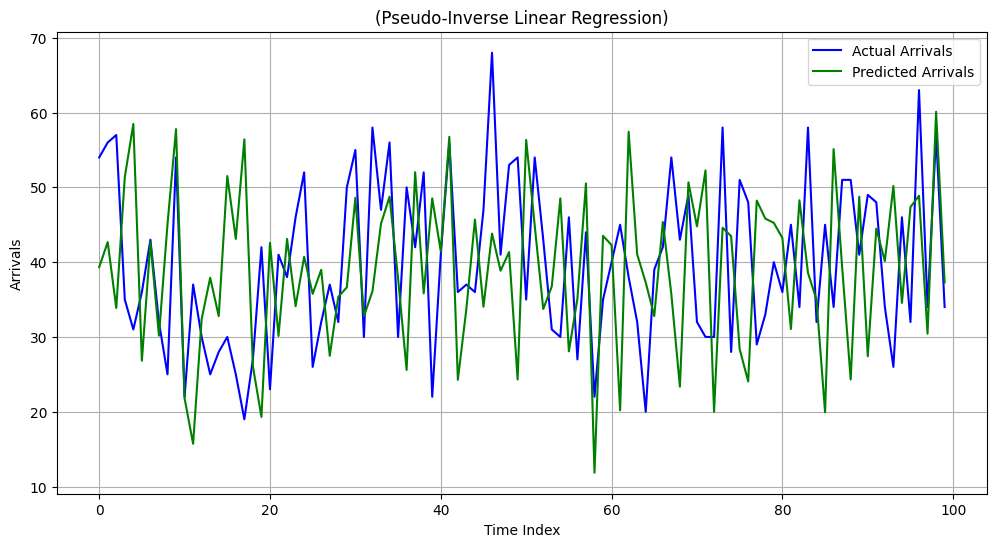

In [9]:
actual = tset_Y.values.flatten()
predicted = pred_Y.flatten()

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(actual, label="Actual Arrivals", color="blue")

# Plot predicted values
plt.plot(predicted, label="Predicted Arrivals", color='green')

plt.title("(Pseudo-Inverse Linear Regression)")
plt.xlabel("Time Index")
plt.ylabel("Arrivals")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Convert to flat arrays
y_true = tset_Y.values.flatten()
y_pred_flat = pred_Y.flatten()

# --- Error metrics ---
mae = mean_absolute_error(y_true, y_pred_flat)
mse = mean_squared_error(y_true, y_pred_flat)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred_flat)

# --- Print ---
print("Model Evaluation:")
print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"MSE  (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R²   (R-squared): {r2:.4f}")

Model Evaluation:
MAE  (Mean Absolute Error): 12.5727
MSE  (Mean Squared Error): 224.5981
RMSE (Root Mean Squared Error): 14.9866
R²   (R-squared): -0.8538
